In [1]:
import urllib.request
import os
from PIL import Image,ImageStat
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torch
import torch.nn as nn
from torch.utils.data import  DataLoader
import torchvision.transforms as transforms
import torchvision.models as models

from torch import optim
import sklearn.metrics as metrics

In [2]:
import torch.nn.functional as F

In [3]:
conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0)
conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1,padding=0)
relu = nn.ReLU()
maxpool = nn.MaxPool2d(kernel_size=2,stride=2,padding=0)
flatten = nn.Flatten()
fc1 = nn.Linear(18496,120)
fc2 = nn.Linear(120,84)
fc3 = nn.Linear(84,10)

In [4]:
x = torch.randn(1,3,150,150)
x = conv1(x)
x = relu(x)
x = maxpool(x)
x = conv2(x)
x = relu(x)
x = maxpool(x)
x = flatten(x)
x = fc1(x)
x = relu(x)
x = fc2(x)
x = relu(x)
x = fc3(x)

In [5]:
x.shape

torch.Size([1, 10])

In [6]:
print(torch.cuda.is_available())

True


In [7]:
# Certifique-se de que o modelo está na GPU
model = torchvision.models.efficientnet_b2(weights = torchvision.models.EfficientNet_B2_Weights.IMAGENET1K_V1)
model.to('cuda:0')

# Movendo os tensores para a GPU
x = torch.rand((1,3,50,50)).to('cuda:0')

# Executando o forward pass com os dados na GPU
output = model(x)

# Checando o modelo e a arquitetura
import torchsummary
torchsummary.summary(model, (3, 50, 50), device='cuda')


Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 158MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 25, 25]             864
       BatchNorm2d-2           [-1, 32, 25, 25]              64
              SiLU-3           [-1, 32, 25, 25]               0
            Conv2d-4           [-1, 32, 25, 25]             288
       BatchNorm2d-5           [-1, 32, 25, 25]              64
              SiLU-6           [-1, 32, 25, 25]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12           [-1, 32, 25, 25]               0
           Conv2d-13           [-1, 16, 25, 25]             512
      BatchNorm2d-14           [-1, 16,

In [8]:
model.classifier[1] = nn.Linear(1408,2)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
main_dir = "/content/drive/MyDrive/Jonathas - Trabalho IA/Trabalho IA/imagens"

In [11]:
os.chdir(main_dir)

In [12]:
import torch
from torchvision import transforms, datasets


# Define transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256
   # transforms.CenterCrop(224),     # Crop the center 224x224 region
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images
])

# Create an ImageFolder dataset
image_dataset = datasets.ImageFolder(root=main_dir, transform=transform)

In [13]:
x,y = next(iter(image_dataset))

In [14]:
image_dataset.classes

['monitor', 'teclado']

In [15]:
image_dataset.class_to_idx

{'monitor': 0, 'teclado': 1}

In [16]:
device = torch.device('cuda:0')
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [17]:
def image_loader(img):
    return Image.open(img).convert("RGB")

In [18]:
img = image_loader('./teclado/IMG_4105.jpeg')

In [19]:
tconvert = transforms.Resize((255,255))

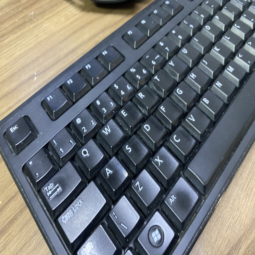

In [20]:
tconvert(img)

In [21]:
tconvert2 =  transforms.CenterCrop((227,227))

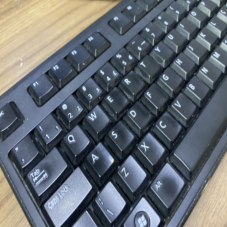

In [22]:
tconvert2((tconvert(img)))

In [23]:
img_tensor = transform(img)

In [24]:
img_tensor

tensor([[[ 1.4954,  1.7009,  1.7352,  ..., -0.1999,  0.5536,  0.1768],
         [ 1.6495,  1.7523,  1.7865,  ..., -0.7650, -0.2513, -0.3712],
         [ 1.7523,  1.7694,  1.7009,  ..., -0.8678, -0.5253, -0.4739],
         ...,
         [ 1.0844,  1.3927,  1.6495,  ...,  0.9988,  0.9132,  0.9646],
         [ 1.3927,  1.6153,  1.5982,  ...,  0.9646,  0.9132,  0.9132],
         [ 1.6838,  1.5468,  1.4098,  ...,  0.9132,  0.9646,  0.8789]],

        [[ 1.3256,  1.5007,  1.5707,  ...,  0.1001,  0.9230,  0.5378],
         [ 1.4832,  1.5882,  1.6232,  ..., -0.4776,  0.0476, -0.0574],
         [ 1.5882,  1.6057,  1.5357,  ..., -0.6001, -0.2325, -0.1975],
         ...,
         [ 0.8880,  1.2031,  1.4482,  ...,  0.7654,  0.6779,  0.7479],
         [ 1.2206,  1.4132,  1.3957,  ...,  0.7304,  0.6779,  0.6779],
         [ 1.5357,  1.3256,  1.2031,  ...,  0.6779,  0.7479,  0.6429]],

        [[ 0.7925,  0.9668,  1.0017,  ...,  0.5659,  1.5768,  1.0888],
         [ 0.9494,  1.0191,  1.0539,  ..., -0

In [25]:
img_tensor.shape

torch.Size([3, 256, 256])

In [26]:
dataset = image_dataset

In [27]:
len(dataset)

400

In [28]:
np.unique(dataset.targets,return_counts=True)

(array([0, 1]), array([200, 200]))

In [29]:
dataset.targets = torch.tensor(dataset.targets)

In [30]:
ds = image_dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
np.unique(ds.targets,return_counts=True)

(array([0, 1]), array([200, 200]))

In [33]:
ds

Dataset ImageFolder
    Number of datapoints: 400
    Root location: /content/drive/MyDrive/Jonathas - Trabalho IA/Trabalho IA/imagens
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [34]:
ds.targets = np.array(ds.targets)

In [35]:
bs = 64
train_idx, temp_idx = train_test_split(np.arange(len(ds)),test_size=0.3,shuffle=True,stratify=ds.targets)
valid_idx, test_idx = train_test_split(temp_idx,test_size=0.5,shuffle=True,stratify=ds.targets[temp_idx])

train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)
test_sampler  = torch.utils.data.SubsetRandomSampler(test_idx)

dl_train = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=train_sampler)
dl_valid = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=valid_sampler)
dl_test  = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=test_sampler)

In [36]:

np.unique(ds.targets[train_idx],return_counts=True)

(array([0, 1]), array([140, 140]))

In [37]:
np.unique(ds.targets[valid_idx],return_counts=True)

(array([0, 1]), array([30, 30]))

In [38]:
np.unique(ds.targets[test_idx],return_counts=True)

(array([0, 1]), array([30, 30]))

In [39]:
x,y = next(iter(dl_train))

In [40]:
x.shape,y.shape

(torch.Size([64, 3, 256, 256]), torch.Size([64]))

In [41]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [42]:
device

device(type='cuda', index=0)

In [43]:
x.to(device)

tensor([[[[ 1.4954,  1.4440,  1.3927,  ...,  1.3927,  1.4269,  1.4098],
          [ 1.3755,  1.2728,  1.1358,  ...,  1.3413,  1.3927,  1.3927],
          [ 1.0673,  0.8276,  0.5193,  ...,  1.3413,  1.3927,  1.4098],
          ...,
          [-2.0152, -2.0152, -2.0152,  ...,  1.5810,  1.6667,  1.5982],
          [-2.0494, -2.0323, -2.0152,  ...,  1.7180,  1.8037,  1.6667],
          [-2.0665, -2.0494, -2.0152,  ...,  1.6495,  1.7352,  1.7352]],

         [[ 1.9034,  1.8683,  1.8333,  ...,  1.2906,  1.3081,  1.3081],
          [ 1.8158,  1.7283,  1.5882,  ...,  1.2381,  1.2906,  1.2906],
          [ 1.5357,  1.2731,  0.9055,  ...,  1.2556,  1.2906,  1.2906],
          ...,
          [-1.8606, -1.8606, -1.8606,  ...,  1.3606,  1.4657,  1.4132],
          [-1.8957, -1.8782, -1.8606,  ...,  1.5357,  1.6583,  1.5182],
          [-1.9132, -1.8957, -1.8782,  ...,  1.4832,  1.5707,  1.5707]],

         [[ 2.3611,  2.3437,  2.3088,  ...,  1.0539,  1.0888,  1.0888],
          [ 2.2566,  2.1694,  

In [44]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [45]:
loss_train = []
loss_eval  = []

In [46]:
patience_time = 15

In [48]:
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(),lr=0.015)

In [49]:
epochs = 100

stop = False
epoch = 0
lowest_loss_eval = 10000
last_best_result = 0
while (not stop):
    #wandb.watch(model)
    model.train()
    lloss = []
    for x,y in dl_train:
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        closs = criterion(pred,y)
        closs.backward()
        opt.step()
        opt.zero_grad()
        lloss.append(closs.item())
        #print(closs.item())
    loss_train.append(np.mean(lloss))
    lloss = []
    model.eval()
    lres = []
    ytrue = []
    with torch.no_grad():
        for data,y in dl_valid:
            data = data.to(device)

            pred = model(data)
            closs = criterion(pred.cpu(),y)
            lloss.append(closs.item())
            res  = pred.argmax(dim=1).cpu().tolist()
            lres += res
            ytrue += y
    avg_loss_eval = np.mean(lloss)
    loss_eval.append(avg_loss_eval)

    if avg_loss_eval < lowest_loss_eval:
        lowest_loss_eval = avg_loss_eval
        last_best_result = 0
        print("Best model found! saving...")
        actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch,'loss_train':loss_train,'loss_eval':loss_eval}
        torch.save(actual_state,'best_model.pth')
    last_best_result += 1
    if last_best_result > patience_time:
        stop = True
    print("epoch %d loss_train %4.3f loss_eval %4.3f last_best %d"%(epoch,loss_train[-1],loss_eval[-1],last_best_result))
    epoch += 1

Best model found! saving...
epoch 0 loss_train 0.643 loss_eval 0.593 last_best 1
Best model found! saving...
epoch 1 loss_train 0.539 loss_eval 0.479 last_best 1
Best model found! saving...
epoch 2 loss_train 0.437 loss_eval 0.397 last_best 1
Best model found! saving...
epoch 3 loss_train 0.387 loss_eval 0.351 last_best 1
Best model found! saving...
epoch 4 loss_train 0.344 loss_eval 0.322 last_best 1
Best model found! saving...
epoch 5 loss_train 0.307 loss_eval 0.296 last_best 1
Best model found! saving...
epoch 6 loss_train 0.292 loss_eval 0.277 last_best 1
Best model found! saving...
epoch 7 loss_train 0.258 loss_eval 0.254 last_best 1
Best model found! saving...
epoch 8 loss_train 0.218 loss_eval 0.238 last_best 1
Best model found! saving...
epoch 9 loss_train 0.195 loss_eval 0.224 last_best 1
Best model found! saving...
epoch 10 loss_train 0.176 loss_eval 0.211 last_best 1
Best model found! saving...
epoch 11 loss_train 0.176 loss_eval 0.203 last_best 1
Best model found! saving..

KeyboardInterrupt: 

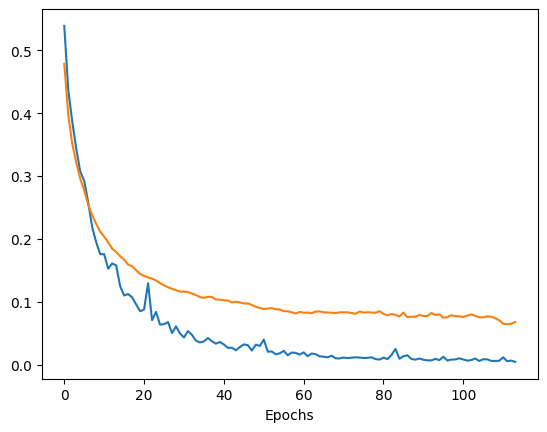

In [50]:
fig = plt.figure()
plt.plot(loss_train[1:])
plt.plot(loss_eval[1:])
plt.xlabel('Epochs')
plt.show()

In [51]:
print(metrics.classification_report(ytrue,lres))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.93      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [52]:
# Definir o modelo EfficientNet B2 com pesos pretreinados (ou None para re-treinar do zero)
model = models.efficientnet_b2(weights=None)
model.classifier[1] = nn.Linear(in_features=model.classifier[1].in_features, out_features=2)

# Carregar os pesos salvos
checkpoint = torch.load('best_model.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model'])
model.eval()


<ipython-input-52-55c47bcebb24>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('best_model.pth', map_location=torch.device('cpu'))


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [53]:
!pip install python-telegram-bot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.1/652.1 kB 33.0 MB/s eta 0:00:00


In [54]:
from telegram import Update
from telegram.ext import Application, CommandHandler, MessageHandler, filters, CallbackContext
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision.models as models

In [55]:
!pip install nest_asyncio

In [56]:
import nest_asyncio

In [57]:
# Definir as transformações para pré-processar as imagens de entrada
transform = transforms.Compose([
    transforms.Resize((256, 256)),                 # Redimensionar para 256x256
    transforms.ToTensor(),                         # Converter para tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizar
])

# Função para processar a imagem
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Abrir a imagem e converter para RGB, se necessário
    image_tensor = transform(image).unsqueeze(0)   # Aplicar transformações e adicionar dimensão do batch
    return image_tensor

# Função para pré-processar a imagem e fazer a predição
def classify_image(image_path):
    image_tensor = preprocess_image(image_path)  # Usa a função de preprocessamento

    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_class = output.max(1)
        class_name = "Teclado" if predicted_class.item() == 1 else "Monitor"
    return class_name

# Função de resposta para o comando /start
async def start(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text("Olá! Envie-me uma imagem para que eu possa classificá-la como Teclado ou Monitor.")

# Função para lidar com imagens enviadas
async def handle_image(update: Update, context: CallbackContext) -> None:
    photo_file = await update.message.photo[-1].get_file()
    image_path = "received_image.jpg"
    await photo_file.download_to_drive(image_path)

    # Classificar a imagem
    class_name = classify_image(image_path)
    await update.message.reply_text(f"Classe prevista: {class_name}")

# Configuração do bot com o token do BotFather
def main():
    application = Application.builder().token("7325411197:AAHYV894eBSZXLBIErY_pFj1PmlOaD4Ayfo").build()

    application.add_handler(CommandHandler("start", start))
    application.add_handler(MessageHandler(filters.PHOTO, handle_image))

    application.run_polling()

if __name__ == '__main__':
    nest_asyncio.apply()
    main()

RuntimeError: Cannot close a running event loop